In [ ]:
%pip install seaborn
%pip install -U scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df= pd.read_csv("car_crashes")
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<AxesSubplot:xlabel='speeding', ylabel='total'>

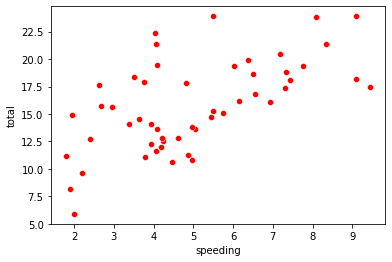

In [22]:
from turtle import color


#sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='total', color="red", data=df)

****************************Variables Dependientes e Independientes***************************

In [23]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['alcohol', 'speeding']]
#Vars_Indep= df[['alcohol']]
Var_Dep= df['total']

In [24]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [25]:
type(model)

sklearn.linear_model._base.LinearRegression

In [26]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [27]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol', 'speeding'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([1.91515359, 0.15016283]),
 'rank_': 2,
 'singular_': array([17.21766943,  7.52409837]),
 'intercept_': 5.68071028149169}

$$
total= 2.0325063 \cdot alcohol + 5.857776154826299

$$

****************************Modelo predictivo***************************

In [30]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
y_pred1= model.predict(X=df[['alcohol', 'speeding']])
#y_pred= model.predict(X=df[['alcohol']])
y_pred1

array([17.58317041, 15.46113865, 16.63239021, 17.44002132, 12.74631024,
       13.72923452, 13.87283639, 15.91275912,  9.03277659, 16.18673465,
       13.59489191, 20.84097605, 15.00534364, 14.70740903, 14.27827139,
       13.59847272, 14.58392899, 15.71765832, 19.71414263, 15.21799037,
       13.97951668, 11.46040818, 13.74988767, 11.34405741, 16.52621814,
       17.20383832, 24.96705547, 15.95910165, 15.50632841, 12.95510587,
       11.95572373, 15.72016257, 13.10310404, 16.63869705, 25.73046709,
       15.45479945, 17.68929856, 12.68862923, 17.85248861, 14.32554265,
       25.81107914, 18.84460283, 17.12582062, 20.96448612,  9.87294918,
       14.10720128, 12.61011485, 13.04844247, 19.65841144, 15.14832868,
       17.44167545])

In [32]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)
df

,Predicciones1,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.583170,17.321112,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,15.461139,15.054867,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,16.632390,16.443069,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,17.440021,17.695093,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.746310,12.686997,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.729235,13.597560,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,13.872836,13.760161,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,15.912759,15.735757,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,9.032777,9.095559,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,16.186735,16.408516,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


<AxesSubplot:xlabel='alcohol', ylabel='total'>

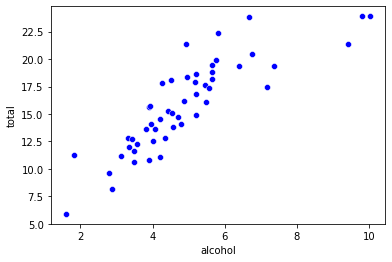

In [17]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

#sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
#sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [33]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7299289749486928

In [34]:
#
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.854358809253286